
Label Distribution in Dataset:
label
Normal    9711
DoS       5741
R2L       2199
Probe     1106
U2R         37
Name: count, dtype: int64


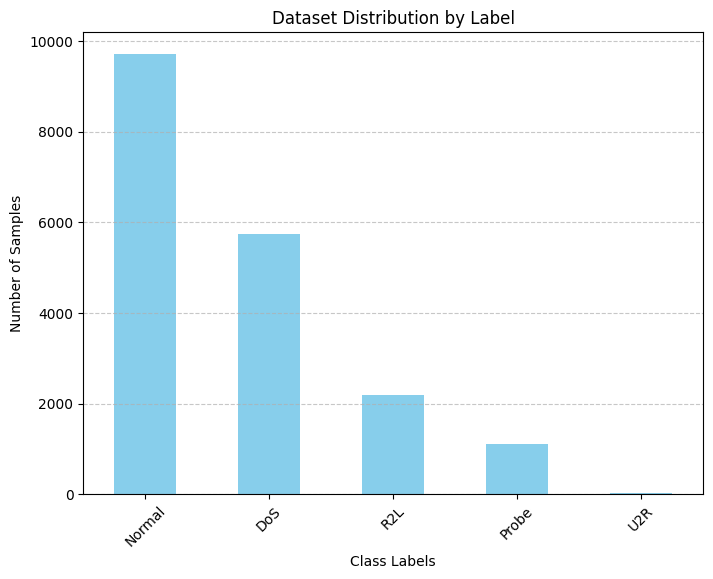

Saved train results for KNN to KNN_train_results.csv
Saved validation results for KNN to KNN_validation_results.csv
Saved test results for KNN to KNN_test_results.csv
Saved train results for KDE_Naive_Bayes to KDE_Naive_Bayes_train_results.csv
Saved validation results for KDE_Naive_Bayes to KDE_Naive_Bayes_validation_results.csv
Saved test results for KDE_Naive_Bayes to KDE_Naive_Bayes_test_results.csv

KNN TRAIN Metrics:
              precision    recall  f1-score   support

         DoS       0.98      0.99      0.99      3405
      Normal       0.99      0.99      0.99      5858
       Probe       0.95      0.94      0.94       662
         R2L       0.98      0.98      0.98      1330
         U2R       0.88      0.33      0.48        21

    accuracy                           0.98     11276
   macro avg       0.95      0.85      0.88     11276
weighted avg       0.98      0.98      0.98     11276



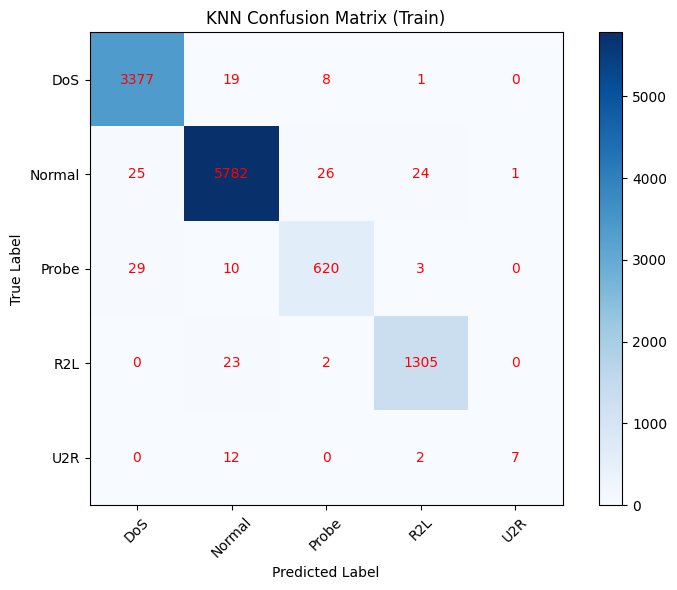


KNN VALIDATION Metrics:
              precision    recall  f1-score   support

         DoS       0.98      0.99      0.99      1173
      Normal       0.98      0.98      0.98      1922
       Probe       0.93      0.93      0.93       213
         R2L       0.96      0.97      0.96       440
         U2R       0.00      0.00      0.00        11

    accuracy                           0.98      3759
   macro avg       0.77      0.77      0.77      3759
weighted avg       0.97      0.98      0.97      3759



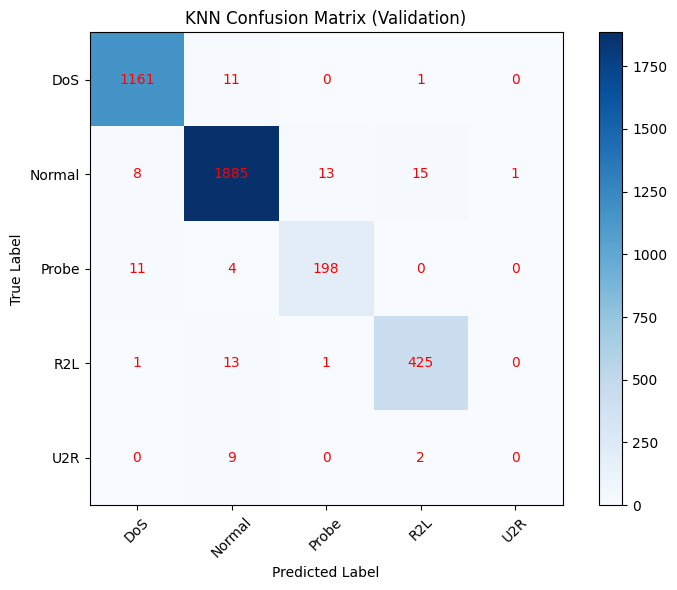


KNN TEST Metrics:
              precision    recall  f1-score   support

         DoS       0.98      0.99      0.98      1163
      Normal       0.98      0.98      0.98      1931
       Probe       0.94      0.90      0.92       231
         R2L       0.97      0.98      0.98       429
         U2R       0.00      0.00      0.00         5

    accuracy                           0.98      3759
   macro avg       0.78      0.77      0.77      3759
weighted avg       0.98      0.98      0.98      3759



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

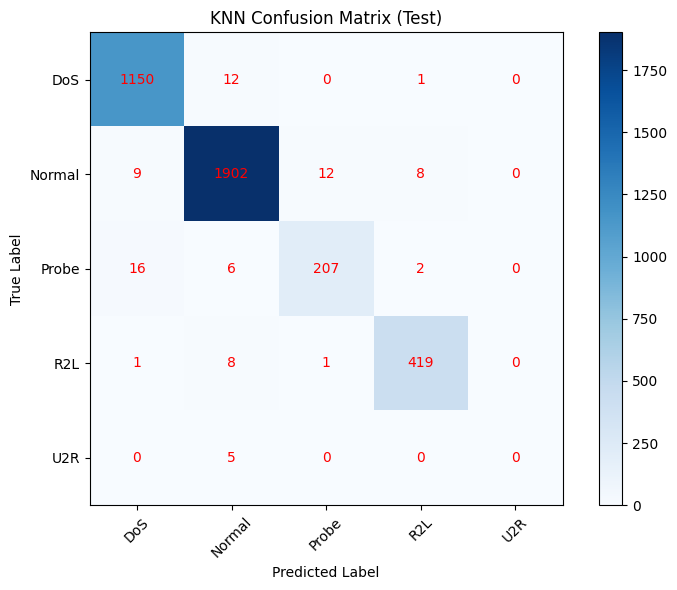


KDE NAIVE BAYES TRAIN Metrics:
              precision    recall  f1-score   support

         DoS       0.41      0.18      0.25      3405
      Normal       0.95      0.71      0.82      5858
       Probe       0.19      1.00      0.32       662
         R2L       0.62      0.85      0.72      1330
         U2R       0.40      0.48      0.43        21

    accuracy                           0.59     11276
   macro avg       0.51      0.65      0.51     11276
weighted avg       0.70      0.59      0.60     11276



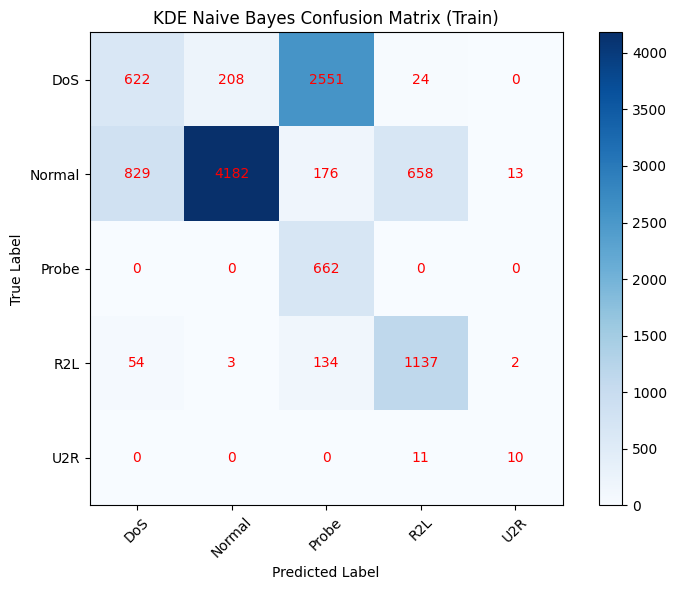


KDE NAIVE BAYES VALIDATION Metrics:
              precision    recall  f1-score   support

         DoS       0.40      0.17      0.24      1173
      Normal       0.95      0.72      0.82      1922
       Probe       0.18      1.00      0.30       213
         R2L       0.62      0.85      0.72       440
         U2R       0.80      0.36      0.50        11

    accuracy                           0.58      3759
   macro avg       0.59      0.62      0.51      3759
weighted avg       0.69      0.58      0.59      3759



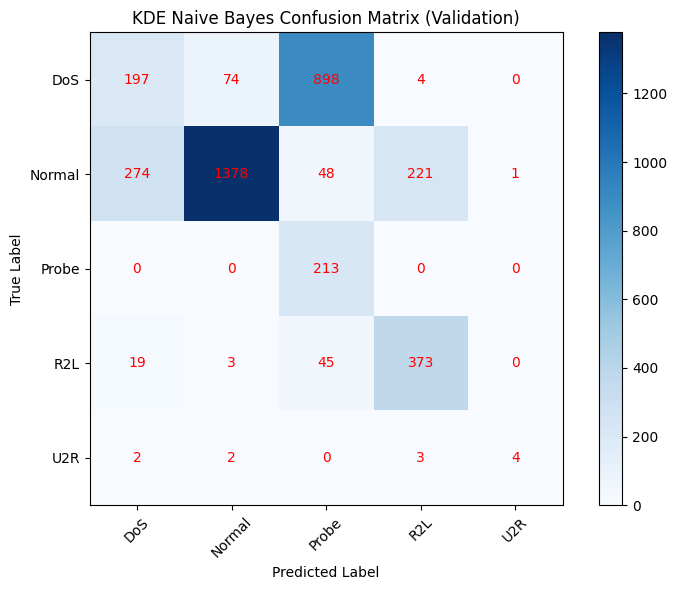


KDE NAIVE BAYES TEST Metrics:
              precision    recall  f1-score   support

         DoS       0.40      0.18      0.25      1163
      Normal       0.95      0.72      0.82      1931
       Probe       0.19      1.00      0.32       231
         R2L       0.64      0.84      0.73       429
         U2R       0.00      0.00      0.00         5

    accuracy                           0.58      3759
   macro avg       0.44      0.55      0.42      3759
weighted avg       0.70      0.58      0.60      3759



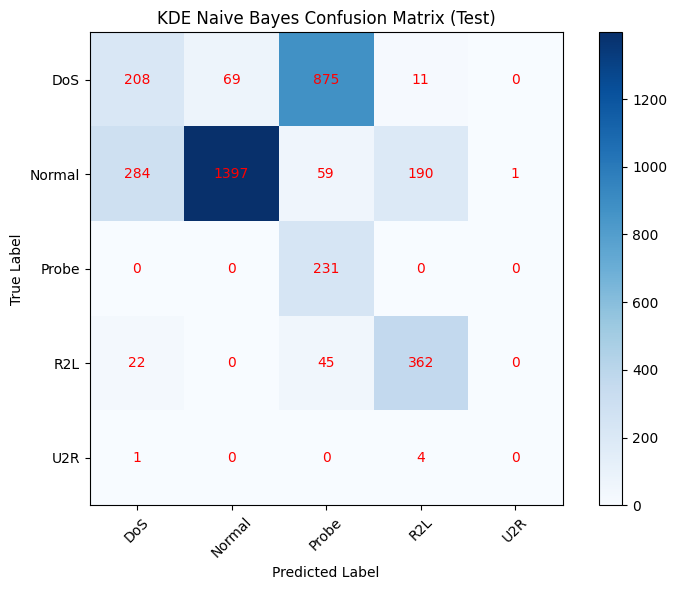

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.decomposition import PCA


# Step 1: Load and preprocess the dataset
def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path, header=None)

    # Define column names based on the dataset format
    columns = [
        "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land", "wrong_fragment", 
        "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised", "root_shell", "su_attempted", 
        "num_root", "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds", 
        "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", 
        "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", 
        "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate", 
        "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate", 
        "dst_host_srv_rerror_rate", "label", "difficulty_level"
    ]
    df.columns = columns

    # Map labels to broader categories
    attack_mapping = {
        "normal": "Normal",
        "back": "DoS", "land": "DoS", "neptune": "DoS", "pod": "DoS", "smurf": "DoS", "teardrop": "DoS",
        "ftp_write": "R2L", "guess_passwd": "R2L", "imap": "R2L", "multihop": "R2L", "phf": "R2L", 
        "spy": "R2L", "warezclient": "R2L", "warezmaster": "R2L",
        "buffer_overflow": "U2R", "loadmodule": "U2R", "perl": "U2R", "rootkit": "U2R",
        "ipsweep": "Probe", "nmap": "Probe", "portsweep": "Probe", "satan": "Probe"
    }
    df['label'] = df['label'].map(attack_mapping)

    # Remove rows with missing or invalid labels
    df = df.dropna(subset=['label'])  # Drop rows with missing labels
    df = df[df['label'] != 'nan']  # Remove rows where label is 'nan'

    # Define valid labels and filter the dataset
    valid_labels = ["Normal", "DoS", "Probe", "R2L", "U2R"]
    df = df[df['label'].isin(valid_labels)]

    return df

# Step 0: Check Dataset Distribution by Label
def check_label_distribution(df):
    label_counts = df['label'].value_counts()
    print("\nLabel Distribution in Dataset:")
    print(label_counts)

    # Plot the label distribution
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='bar', color='skyblue')
    plt.xlabel("Class Labels")
    plt.ylabel("Number of Samples")
    plt.title("Dataset Distribution by Label")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Load and preprocess dataset
data_file = "./nsl-kdd/KDDTest+.txt"
data = load_and_preprocess_data(data_file)

# Check label distribution
check_label_distribution(data)

# Step 2: Encode features and labels
def encode_features_and_labels(df):
    label_encoder = LabelEncoder()
    for column in ["protocol_type", "service", "flag"]:
        df[column] = label_encoder.fit_transform(df[column])

    X = df.drop(["label", "difficulty_level"], axis=1)
    y = label_encoder.fit_transform(df['label'])

    return X, y, label_encoder

# Step 3: KDE-based Naive Bayes Classifier
class KDENaiveBayes:
    def __init__(self, n_components=10):
        self.kdes = {}
        self.class_priors = {}
        self.pca = PCA(n_components=n_components)

    def fit(self, X, y):
        X_reduced = self.pca.fit_transform(X)
        self.classes = np.unique(y)
        self.kdes = {}
        self.class_priors = {}
        for cls in self.classes:
            X_cls = X_reduced[y == cls]
            self.kdes[cls] = [gaussian_kde(X_cls[:, i]) for i in range(X_reduced.shape[1])]
            self.class_priors[cls] = len(X_cls) / len(y)

    def predict(self, X):
        X_reduced = self.pca.transform(X)
        probabilities = []
        for cls in self.classes:
            class_prob = self.class_priors[cls]
            feature_probs = [
                kde.evaluate(X_reduced[:, i]) for kde, i in zip(self.kdes[cls], range(X_reduced.shape[1]))
            ]
            probabilities.append(class_prob * np.prod(feature_probs, axis=0))
        probabilities = np.array(probabilities).T
        return np.argmax(probabilities, axis=1)

# Step 4: Save Predictions to CSV
def save_predictions_to_csv(model_name, split, true_labels, predicted_labels, label_encoder):
    df = pd.DataFrame({
        "True Label": label_encoder.inverse_transform(true_labels),
        "Predicted Label": label_encoder.inverse_transform(predicted_labels)
    })
    file_name = f"{model_name}_{split}_results.csv"
    df.to_csv(file_name, index=False)
    print(f"Saved {split} results for {model_name} to {file_name}")

# Step 5: Plot Confusion Matrix
def plot_confusion_matrix(cm, title, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="red")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Step 6: Train, Validate, and Evaluate Models
def train_validate_evaluate(X_train, X_val, X_test, y_train, y_val, y_test, label_encoder):
    results = {}

    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    knn_train_pred = knn.predict(X_train)
    knn_val_pred = knn.predict(X_val)
    knn_test_pred = knn.predict(X_test)

    # Train KDE Naive Bayes
    kde_nb = KDENaiveBayes()
    kde_nb.fit(X_train, y_train)
    nb_train_pred = kde_nb.predict(X_train)
    nb_val_pred = kde_nb.predict(X_val)
    nb_test_pred = kde_nb.predict(X_test)

    # Save predictions for train, validation, and test sets
    for model_name, train_pred, val_pred, test_pred in [
        ("KNN", knn_train_pred, knn_val_pred, knn_test_pred),
        ("KDE_Naive_Bayes", nb_train_pred, nb_val_pred, nb_test_pred)
    ]:
        for split, true_labels, pred_labels in [
            ("train", y_train, train_pred),
            ("validation", y_val, val_pred),
            ("test", y_test, test_pred)
        ]:
            save_predictions_to_csv(model_name, split, true_labels, pred_labels, label_encoder)

    # Metrics Calculation
    def calculate_metrics(model_name, split, true_labels, predicted_labels):
        report = classification_report(true_labels, predicted_labels, target_names=label_encoder.classes_)
        cm = confusion_matrix(true_labels, predicted_labels)
        print(f"\n{model_name.upper()} {split.upper()} Metrics:")
        print(report)

        # Plot Confusion Matrix
        plot_confusion_matrix(cm, f"{model_name} Confusion Matrix ({split.capitalize()})", label_encoder.classes_)
        return report, cm

    # Metrics for KNN
    results["knn_train"] = calculate_metrics("KNN", "train", y_train, knn_train_pred)
    results["knn_val"] = calculate_metrics("KNN", "validation", y_val, knn_val_pred)
    results["knn_test"] = calculate_metrics("KNN", "test", y_test, knn_test_pred)

    # Metrics for KDE Naive Bayes
    results["kde_nb_train"] = calculate_metrics("KDE Naive Bayes", "train", y_train, nb_train_pred)
    results["kde_nb_val"] = calculate_metrics("KDE Naive Bayes", "validation", y_val, nb_val_pred)
    results["kde_nb_test"] = calculate_metrics("KDE Naive Bayes", "test", y_test, nb_test_pred)

    return results

# Main Flow
data_file = "./nsl-kdd/KDDTest+.txt"
data = load_and_preprocess_data(data_file)
X, y, label_encoder = encode_features_and_labels(data)

# Preprocess data without SMOTE
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Train, Validate, and Evaluate
results = train_validate_evaluate(X_train, X_val, X_test, y_train, y_val, y_test, label_encoder)




